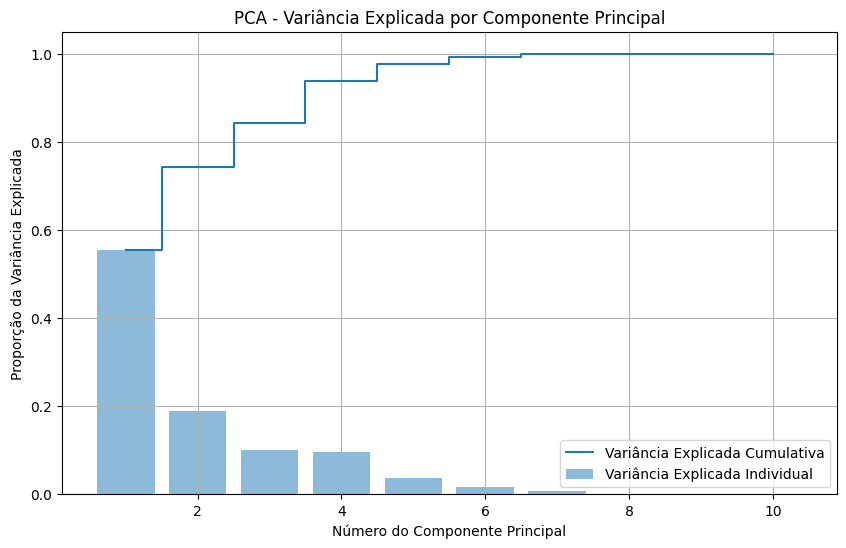

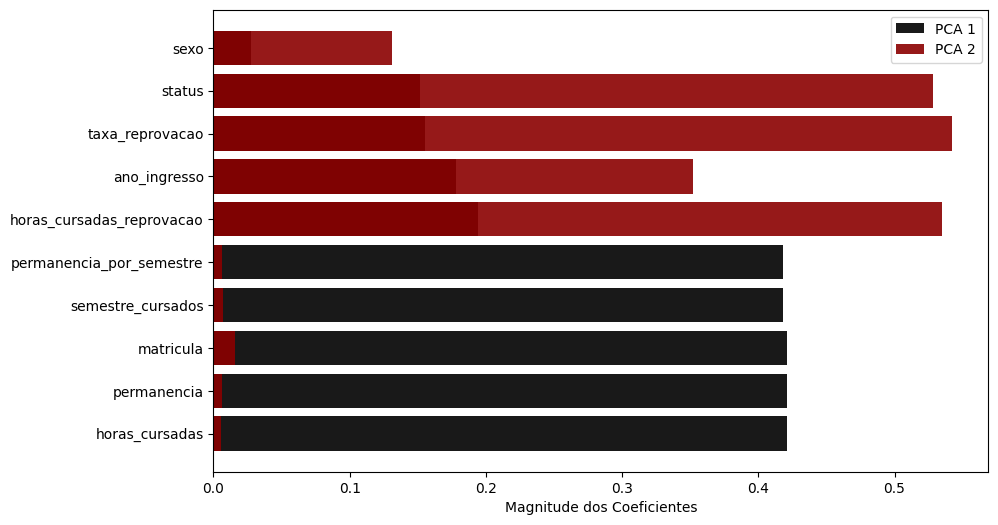

Variáveis mais influentes em PCA1:
horas_cursadas               0.421410
permanencia                  0.421390
matricula                    0.421085
semestre_cursados            0.418419
permanencia_por_semestre     0.418408
horas_cursadas_reprovacao    0.194057
ano_ingresso                 0.178181
taxa_reprovacao              0.155507
status                       0.151872
sexo                         0.027186
Name: PCA1, dtype: float64

Variáveis mais influentes em PCA2:
taxa_reprovacao              0.541862
horas_cursadas_reprovacao    0.534554
status                       0.528171
ano_ingresso                 0.352146
sexo                         0.131424
matricula                    0.015463
semestre_cursados            0.007148
permanencia_por_semestre     0.006351
permanencia                  0.005974
horas_cursadas               0.005208
Name: PCA2, dtype: float64


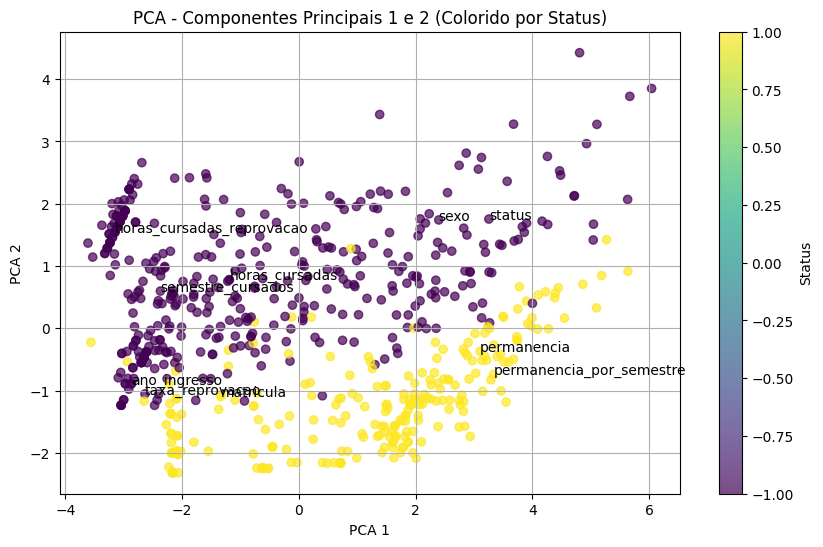

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Carregar os dados
df = pd.read_csv('df_total.csv', sep=',')

nomes = {
    'ch_cumprida': 'horas_cursadas',
    'ch_cumprida_dividida': 'permanencia',
    'ch_reprovacao': 'horas_cursadas_reprovacao',
    'semestre_total': 'semestre_cursados',
    'semestre_dividido': 'permanencia_por_semestre'
}

df.rename(columns=nomes, inplace=True)


# Selecionar colunas numéricas relevantes para a PCA
numerical_columns = [
    'ano_ingresso', 'sexo', 'horas_cursadas', 'permanencia', 'taxa_reprovacao', 'horas_cursadas_reprovacao', 
    'semestre_cursados', 'permanencia_por_semestre', 'matricula', 'status'
]

# Extrair os dados numéricos
X = df[numerical_columns]

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar a PCA
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_scaled)

# Criar um DataFrame com os componentes principais
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10'])

# Analisar os componentes carregados
loadings = pca.components_.T
loading_df = pd.DataFrame(loadings, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10'], index=numerical_columns)

# Determinar variáveis mais influentes
most_influential_pca1 = loading_df['PCA1'].abs().sort_values(ascending=False)
most_influential_pca2 = loading_df['PCA2'].abs().sort_values(ascending=False)

# Gráfico de variância explicada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Variância Explicada Individual')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Variância Explicada Cumulativa')
plt.title('PCA - Variância Explicada por Componente Principal')
plt.xlabel('Número do Componente Principal')
plt.ylabel('Proporção da Variância Explicada')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Gráfico de variáveis mais influentes
plt.figure(figsize=(10, 6))
plt.barh(most_influential_pca1.index, most_influential_pca1, color='black', alpha=0.7, label='PCA 1')
plt.barh(most_influential_pca2.index, most_influential_pca2, color='DarkRed', alpha=0.7, label='PCA 2')
plt.xlabel('Magnitude dos Coeficientes')
plt.legend()
plt.grid(False)
plt.show()

# Exibir as variáveis mais influentes
print("Variáveis mais influentes em PCA1:")
print(most_influential_pca1)
print("\nVariáveis mais influentes em PCA2:")
print(most_influential_pca2)

# Gráfico de dispersão colorido pela variável 'status'
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df['status'], cmap='viridis', alpha=0.7)
plt.title('PCA - Componentes Principais 1 e 2 (Colorido por Status)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter, label='Status')

# Adicionar nomes das variáveis na legenda
for i, txt in enumerate(numerical_columns):
    plt.annotate(txt, (df_pca['PCA1'][i], df_pca['PCA2'][i]))

plt.grid(True)
plt.show()

